# Задание 2.  Воспроизведение замеров с помощью MyPy, Cython, Numba

### Будем исследовать два алгоритма (рекурсивный и линейный) подсчёта гармонических чисел.

Построим для каждого алгоритма график, показывающий время работы каждого их них для подсчёта первых 20 гармонических чисел.

Также построим третий график, который будет нам демонстрировать минимальное время из работы двух алгоритмов для каждого из 20 чисел соответственно.

### Будем воспроизводить наши исследования с помощью MyPy, Cython и Numba. Посмотрим, изменится ли время работы алгоритмов.

Таймер поможет нам оценить работу алгоритма в каждом случае в наносекундах:

In [2]:
import time

class Timer:
    def __init__(self, func):
        self.func = func
 
    def __call__(self, *args, **kwargs):
        tic = time.perf_counter()
        self.func(*args, **kwargs)
        toc = time.perf_counter()
        res = int((toc - tic)*1000000000)
        return res

Установим matplotlib, чтобы рисовать графики:

In [ ]:
pip install matplotlib

Итак, наш исходный код:

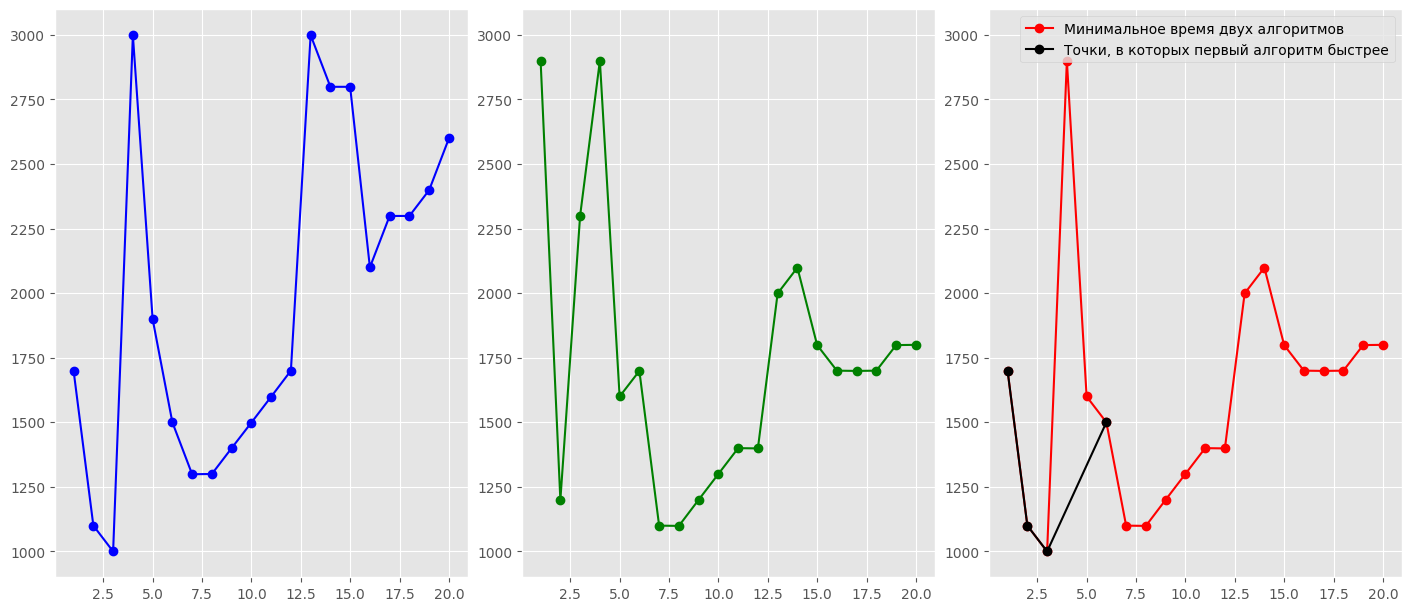

In [4]:
"""Импортируем библиотеку matplotlib для рисования графиков"""

import matplotlib.pyplot as plt
from matplotlib import style   
style.use('ggplot')

"""Первый алгоритм"""

def harmonic_recursion(n):
    if n == 1: 
        return 1
    else:
        return harmonic_recursion(n-1) + (1/n)

"""Второй алгоритм"""

def harmonic_formule(n):
    sum = 0
    for k in range(1, (n+1)):
        sum += 1/k
    return sum

"""Получение и запись времени работы алгоритмов"""
first_func_res = []
second_func_res = []
for i in range(1, 21):
    first_func_res.append(Timer(harmonic_recursion)(i))
    second_func_res.append(Timer(harmonic_formule)(i))

"""Запись минимального времени получения каждого из гармонических чисел"""
minimal_res = []
for i in range(20):
   minimal_res.append(min(first_func_res[i], second_func_res[i]))

"""Запись времени получения чисел, с подсчётом которых быстрее справляется первый алгоритм"""
faster = []
x_fast = []
for i in range(20):
    if first_func_res[i] < second_func_res[i]:
        faster.append(first_func_res[i])
        x_fast.append(i+1)


x_graph = [int(i) for i in range(1, 21)]

"""Отображение графиков"""
fg = plt.figure(constrained_layout=True, figsize=(14, 6))
gs = plt.GridSpec(ncols=3, nrows=1, figure=fg)
ax_1 = fg.add_subplot(gs[0, 0])
plt.plot(x_graph, first_func_res, '-o', color = "blue", label = "Рекурсивный алгоритм")
ax_2 = fg.add_subplot(gs[0, 1], sharey=ax_1)
plt.plot(x_graph, second_func_res, '-o', color = "green", label = "Линейный алгоритм")
ax_3 = fg.add_subplot(gs[0, 2], sharey=ax_1)
plt.plot(x_graph, minimal_res, '-o', color = "red", label = "Минимальное время двух алгоритмов")
plt.plot(x_fast, faster, '-o', color = "black", label = "Точки, в которых первый алгоритм быстрее")
plt.legend()
plt.show()


## Итак, получили графики. 

    Можно заметить, что рекурсивный алгоритм справляется быстрее при вычислении нескольких первых гармонических чисел.

    Минимальное время работы колеблется в пределах 1000-3000 и больше нс

# Воспользуемся MyPy...

Установка IPython:

In [ ]:
pip install ipython

Установка MyPy:

In [ ]:
pip install mypy

Расширение для Jupyter Notebook:

In [ ]:
%load_ext mypy_ipython

Success: no issues found in 1 source file
Type checking successful


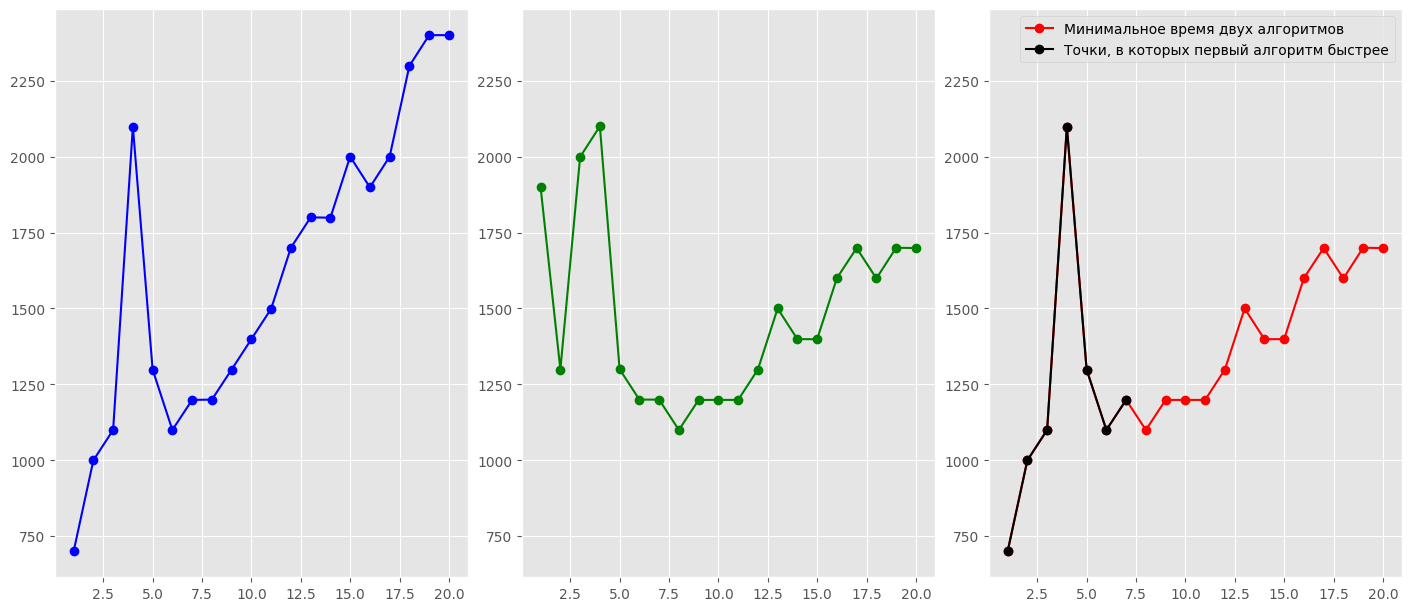

In [ ]:
%mypy

"""Наш таймер для измерения времени работы алгоритмов"""
import time

class Timer:
    def __init__(self, func) -> None:
        self.func = func
 
    def __call__(self, *args, **kwargs) -> int:
        tic: float = time.perf_counter()
        self.func(*args, **kwargs)
        toc: float = time.perf_counter()
        res = int((toc - tic)*1000000000)
        return res

"""Импортируем библиотеку matplotlib для рисования графиков"""

import matplotlib.pyplot as plt
from matplotlib import style   
style.use('ggplot')

"""Первый алгоритм"""

def harmonic_recursion(n: int) -> float:
    if n == 1: 
        return 1
    else:
        return harmonic_recursion(n-1) + (1/n)

"""Второй алгоритм"""

def harmonic_formule(n: int) -> float:
    sum: float = 0
    for k in range(1, (n+1)):
        sum += 1/k
    return sum

"""Получение и запись времени работы алгоритмов"""
first_func_res: list[int]= []
second_func_res: list[int] = []
for i in range(1, 21):
    first_func_res.append(Timer(harmonic_recursion)(i))
    second_func_res.append(Timer(harmonic_formule)(i))

"""Запись минимального времени получения каждого из гармонических чисел"""
minimal_res: list[int] = []
for i in range(20):
   minimal_res.append(min(first_func_res[i], second_func_res[i]))

"""Запись времени получения чисел, с подсчётом которых быстрее справляется первый алгоритм"""
faster: list[int] = []
x_fast: list[int] = []
for i in range(20):
    if first_func_res[i] < second_func_res[i]:
        faster.append(first_func_res[i])
        x_fast.append(i+1)


x_graph: list[int] = [int(i) for i in range(1, 21)]

"""Отображение графиков"""
fg = plt.figure(constrained_layout=True, figsize=(14, 6))
gs = plt.GridSpec(ncols=3, nrows=1, figure=fg)
ax_1 = fg.add_subplot(gs[0, 0])
plt.plot(x_graph, first_func_res, '-o', color = "blue", label = "Рекурсивный алгоритм")
ax_2 = fg.add_subplot(gs[0, 1], sharey=ax_1)
plt.plot(x_graph, second_func_res, '-o', color = "green", label = "Линейный алгоритм")
ax_3 = fg.add_subplot(gs[0, 2], sharey=ax_1)
plt.plot(x_graph, minimal_res, '-o', color = "red", label = "Минимальное время двух алгоритмов")
plt.plot(x_fast, faster, '-o', color = "black", label = "Точки, в которых первый алгоритм быстрее")
plt.legend()
plt.show()


## И вот! MyPy ускоряет работу наших алгоритмов!

    Также рекурсивный алгоритм справляется быстрее при вычислении нескольких первых гармонических чисел.

    Минимальное время работы колеблется в пределах 750-2500 нс

# Пришёл черёд Cython! Погрузимся в исследование:

Установка Cython:

In [ ]:
pip install Cython

Расширение для Jupyter Notebook:

In [2]:
%load_ext cython 

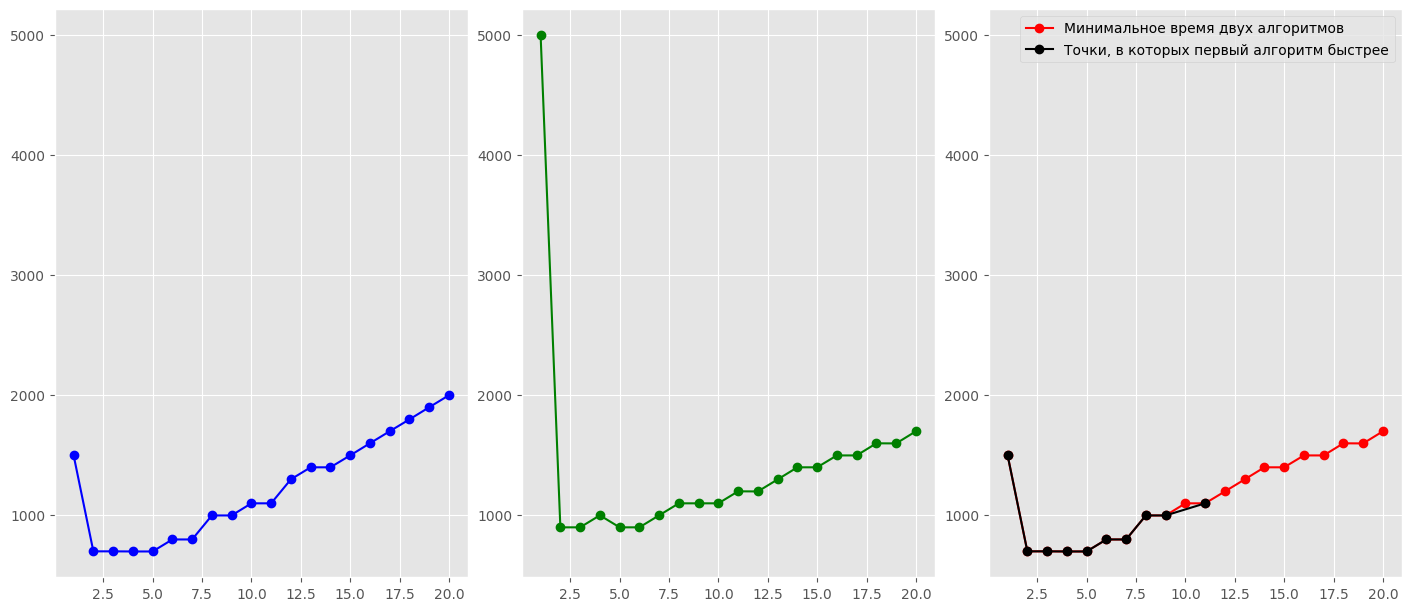

In [3]:
%%cython

"""Наш таймер для измерения времени работы алгоритмов"""

import time

class Timer:
    def __init__(self, func):
        self.func = func
 
    def __call__(self, *args, **kwargs):
        tic = time.perf_counter()
        self.func(*args, **kwargs)
        toc = time.perf_counter()
        res = int((toc - tic)*1000000000)
        return res

"""Импортируем библиотеку matplotlib для рисования графиков"""

import matplotlib.pyplot as plt
from matplotlib import style   
style.use('ggplot')

"""Первый алгоритм"""

def harmonic_recursion(n):
    if n == 1: 
        return 1
    else:
        return harmonic_recursion(n-1) + (1/n)

"""Второй алгоритм"""

def harmonic_formule(n):
    sum = 0
    for k in range(1, (n+1)):
        sum += 1/k
    return sum

"""Получение и запись времени работы алгоритмов"""
first_func_res = []
second_func_res = []
for i in range(1, 21):
    first_func_res.append(Timer(harmonic_recursion)(i))
    second_func_res.append(Timer(harmonic_formule)(i))

"""Запись минимального времени получения каждого из гармонических чисел"""
minimal_res = []
for i in range(20):
   minimal_res.append(min(first_func_res[i], second_func_res[i]))

"""Запись времени получения чисел, с подсчётом которых быстрее справляется первый алгоритм"""
faster = []
x_fast = []
for i in range(20):
    if first_func_res[i] < second_func_res[i]:
        faster.append(first_func_res[i])
        x_fast.append(i+1)


x_graph = [int(i) for i in range(1, 21)]

"""Отображение графиков"""
fg = plt.figure(constrained_layout=True, figsize=(14, 6))
gs = plt.GridSpec(ncols=3, nrows=1, figure=fg)
ax_1 = fg.add_subplot(gs[0, 0])
plt.plot(x_graph, first_func_res, '-o', color = "blue", label = "Рекурсивный алгоритм")
ax_2 = fg.add_subplot(gs[0, 1], sharey=ax_1)
plt.plot(x_graph, second_func_res, '-o', color = "green", label = "Линейный алгоритм")
ax_3 = fg.add_subplot(gs[0, 2], sharey=ax_1)
plt.plot(x_graph, minimal_res, '-o', color = "red", label = "Минимальное время двух алгоритмов")
plt.plot(x_fast, faster, '-o', color = "black", label = "Точки, в которых первый алгоритм быстрее")
plt.legend()
plt.show()


## А вот и результаты! Cython немного уступает MyPy, но всё равно иногда быстрее классического Python'a

    Удивительно, но теперь рекурсивный алгоритм справляется в некоторых случаях быстрее, чем линейный!

    Минимальное время работы колеблется в пределах 750-3000 нс.

# Проверим теперь, как работает Numba 

Установка Numba:

In [ ]:
pip install numba

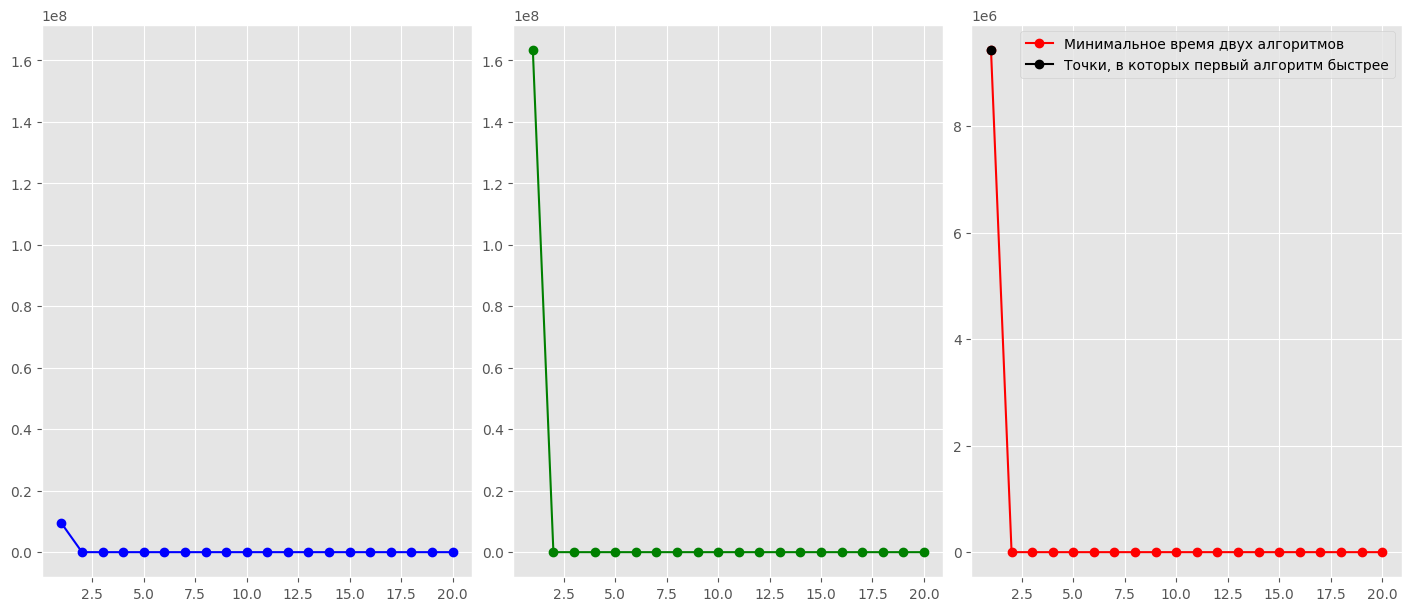

In [ ]:
from numba import jit
from numba.experimental import jitclass

"""Наш таймер для измерения времени работы алгоритмов"""

import time

class Timer:
    def __init__(self, func):
        self.func = func
 
    def __call__(self, *args, **kwargs):
        tic = time.perf_counter()
        self.func(*args, **kwargs)
        toc = time.perf_counter()
        res = int((toc - tic)*1000000000)
        return res

"""Импортируем библиотеку matplotlib для рисования графиков"""

import matplotlib.pyplot as plt
from matplotlib import style   
style.use('ggplot')

"""Первый алгоритм"""

@jit(cache=True, nopython=True)
def harmonic_recursion(n):
    if n == 1: 
        return 1
    else:
        return harmonic_recursion(n-1) + (1/n)

"""Второй алгоритм"""

@jit
def harmonic_formule(n):
    sum = 0
    for k in range(1, (n+1)):
        sum += 1/k
    return sum

"""Получение и запись времени работы алгоритмов"""
first_func_res = []
second_func_res = []
for i in range(1, 21):
    first_func_res.append(Timer(harmonic_recursion)(i))
    second_func_res.append(Timer(harmonic_formule)(i))

"""Запись минимального времени получения каждого из гармонических чисел"""
minimal_res = []
for i in range(20):
   minimal_res.append(min(first_func_res[i], second_func_res[i]))

"""Запись времени получения чисел, с подсчётом которых быстрее справляется первый алгоритм"""
faster = []
x_fast = []
for i in range(20):
    if first_func_res[i] < second_func_res[i]:
        faster.append(first_func_res[i])
        x_fast.append(i+1)


x_graph = [int(i) for i in range(1, 21)]
x = [int(i) for i in range(1, 21)]
"""Отображение графиков"""
fg = plt.figure(constrained_layout=True, figsize=(14, 6))
gs = plt.GridSpec(ncols=3, nrows=1, figure=fg)
ax_2 = fg.add_subplot(gs[0, 1])
plt.plot(x_graph, second_func_res, '-o', color = "green", label = "Линейный алгоритм")
ax_1 = fg.add_subplot(gs[0, 0], sharey=ax_2)
plt.plot(x_graph, first_func_res, '-o', color = "blue", label = "Рекурсивный алгоритм")
ax_3 = fg.add_subplot(gs[0, 2])
plt.plot(x, minimal_res, '-o', color = "red", label = "Минимальное время двух алгоритмов")
plt.plot(x_fast, faster, '-o', color = "black", label = "Точки, в которых первый алгоритм быстрее")
plt.legend()
plt.show()


## Итак, в нашем случае Numba справляется хуже своих конкурентов.... 🤯 ~~казалось бы~~

Перечислим несколько полученных выводов:

    Вычисление первого числа занимает самое большое количество времени, а остальных - гораздо меньше.

    Рекурсивный алгоритм быстрее в некоторых отдельных точках.

    Минимальное время работы достигает 2-3 * 1е8 нс

Немного изучим первый вывод:
    
    не будем выводить на третьем графике время вычисления первого числа. 

За какое же время вычисляются остальные числа?


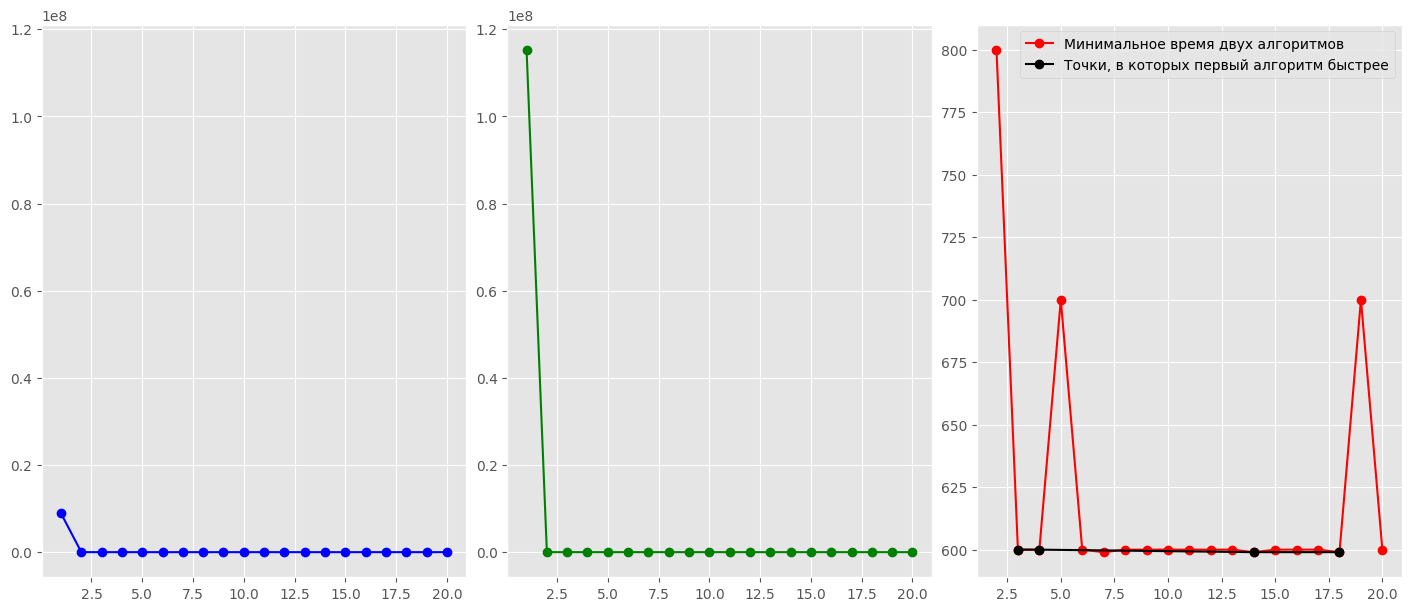

In [ ]:
from numba import jit

"""Наш таймер для измерения времени работы алгоритмов"""

import time

class Timer:
    def __init__(self, func):
        self.func = func
 
    def __call__(self, *args, **kwargs):
        tic = time.perf_counter()
        self.func(*args, **kwargs)
        toc = time.perf_counter()
        res = int((toc - tic)*1000000000)
        return res

"""Импортируем библиотеку matplotlib для рисования графиков"""

import matplotlib.pyplot as plt
from matplotlib import style   
style.use('ggplot')

"""Первый алгоритм"""

@jit(cache=True, nopython=True)
def harmonic_recursion(n):
    if n == 1: 
        return 1
    else:
        return harmonic_recursion(n-1) + (1/n)

"""Второй алгоритм"""

@jit
def harmonic_formule(n):
    sum = 0
    for k in range(1, (n+1)):
        sum += 1/k
    return sum

"""Получение и запись времени работы алгоритмов"""
first_func_res = []
second_func_res = []
for i in range(1, 21):
    first_func_res.append(Timer(harmonic_recursion)(i))
    second_func_res.append(Timer(harmonic_formule)(i))

"""Запись минимального времени получения каждого из гармонических чисел"""
minimal_res = []
for i in range(1, 20):
   minimal_res.append(min(first_func_res[i], second_func_res[i]))

"""Запись времени получения чисел, с подсчётом которых быстрее справляется первый алгоритм"""
faster = []
x_fast = []
for i in range(1, 20):
    if first_func_res[i] < second_func_res[i]:
        faster.append(first_func_res[i])
        x_fast.append(i+1)


x_graph = [int(i) for i in range(1, 21)]
x = [int(i) for i in range(2, 21)]
"""Отображение графиков"""
fg = plt.figure(constrained_layout=True, figsize=(14, 6))
gs = plt.GridSpec(ncols=3, nrows=1, figure=fg)
ax_2 = fg.add_subplot(gs[0, 1])
plt.plot(x_graph, second_func_res, '-o', color = "green", label = "Линейный алгоритм")
ax_1 = fg.add_subplot(gs[0, 0], sharey=ax_2)
plt.plot(x_graph, first_func_res, '-o', color = "blue", label = "Рекурсивный алгоритм")
ax_3 = fg.add_subplot(gs[0, 2])
plt.plot(x, minimal_res, '-o', color = "red", label = "Минимальное время двух алгоритмов")
plt.plot(x_fast, faster, '-o', color = "black", label = "Точки, в которых первый алгоритм быстрее")
plt.legend()
plt.show()


## О, чудо! Оказывается Numba справляется быстрее MyPy!

    При вычислении чисел (кроме первого) минимальное время колеблется в пределах 600-1000 нс! 